# Detection on one trace

Here, we want to test the detection method in one trace. This method is explained in the report.

In [1]:
import matplotlib.pyplot as plt

import analysis
import catalog
import figures

catalog.display_parameters()

## Load the catalog

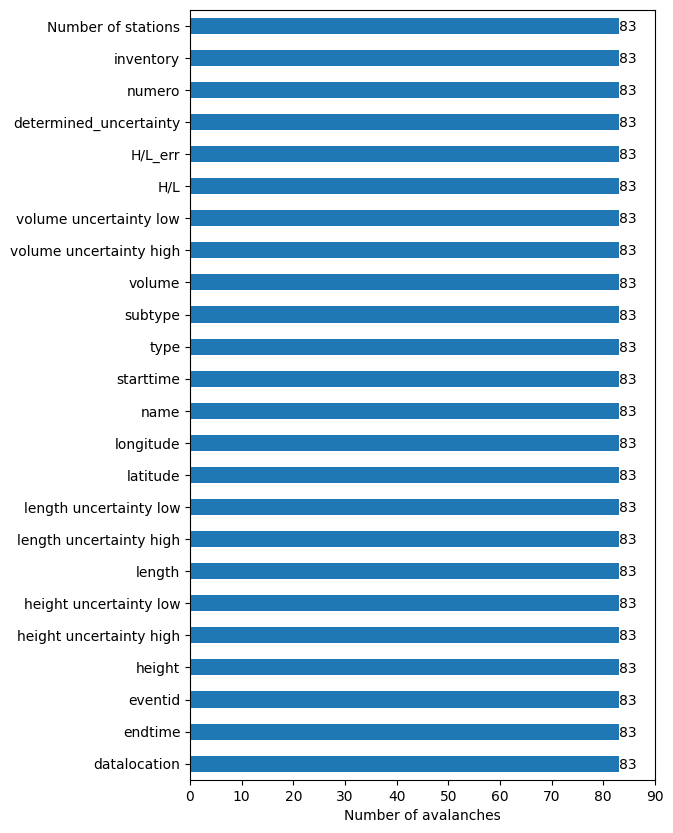

In [2]:
ESEC_avalanches = catalog.load("catalog/6_ESEC_avalanches_83.pickle")

catalog.open_plot(ESEC_avalanches, pos_number=0.15, xlim=90)

## Choose one event and one trace

In [3]:
event_index = 8
trace_index = 0

## The detection method

In [4]:
## Filtering seismic data
_, _, trace = analysis.filter_stream(ESEC_avalanches, event_index, trace_index, freq_HP=9, freq_LP=0.5, max_percentage=0.3)

## The detection method
time_start_detection, data_start_detection, trimmed_time, trimmed_data, time_raw, data_raw, upper_threshold, lower_threshold, _ = analysis.detection_on_one_trace(trace, ESEC_avalanches, event_index, trace_index, -30, 10, detection_yes_or_no=[])

The distance of the trace is 80.84173760387873
Detection on trace 0


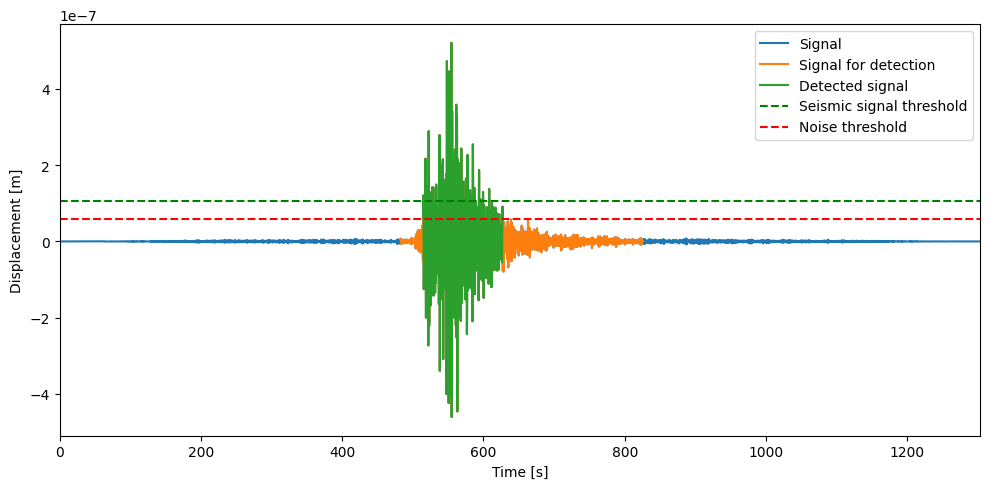

In [5]:
## Plot the raw signal after filtering, the signal for detection based on the start and end time from ESEC, the detected signal and the thresholds
figures.plot_detected_signal(time_start_detection, data_start_detection, trimmed_time, trimmed_data, time_raw, data_raw, upper_threshold, lower_threshold)

figures.save(f"figures/detected_method_on_trace_{trace_index}_in_event_{event_index}")
plt.show()